# Taxa de analfabetismo no Brasil nos anos de 1998 a 2014 com foco na população entre 10 e 14 anos.

Segundo dados oficiais do IBGE, em 2014 haviam aproximadamente de 13,2 milhões de pessoas analfabetas no Brasil acima dos 15 anos. Segundo o próprio órgão, a maior taxa se concentra em idades mais elevadas, entre 40 e 59 anos, em que analfabetos representam cerca de 9,2% dessa faixa etária, e acima dos 60 anos, em torno dos 23,1%.
Visto as informações apresentadas acima, este trabalho tem como premissa analisar os dados compartilhados pelo IPEA (http://www.ipeadata.gov.br/), sobre a população analfabeta no Brasil entre os anos de 1998 e 2014, com idades entre 10 a 14 anos, segmentando por estados brasileiros. Na nossas análise iremos identificar, por exemplo, os estados com maior taxa de analfabetismo e se houve redução da taxa de analfabetismo ao longo do período.

### Conhecendo os dados

In [1]:
#importando bibliotecas
import pandas as pd 
import numpy as mp
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as sts

plt.style.use('ggplot')

In [2]:
#importando dados
df = pd.read_excel('ipeadata.xlsx',
                sheet_name='ipeadata',
                        header=1) 

In [3]:
#visualizando as primeiras 3 linhas 
df.head(3)

,Sigla,Código,Estado,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2011,2012,2013,2014
0,AC,12,Acre,4.851204,10.319716,3.185275,7.611393,5.199443,6.399893,10.102367,7.113136,7.068632,4.247503,4.127122,5.239227,4.613602,3.399697,5.087932
1,AL,27,Alagoas,28.624265,18.129328,11.961741,9.012150,11.438274,11.322209,9.076895,7.978626,8.862038,7.885538,5.270794,5.000698,4.593473,3.690402,5.481867
2,AM,13,Amazonas,3.538671,2.870665,3.655954,4.305794,2.652704,3.984505,2.064526,2.425760,3.267151,3.460810,1.407759,2.653025,4.316967,2.160389,1.765466


In [4]:
#verificando o número de linhas e colunas 
df.shape

(27, 18)

In [5]:
#principais informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Código  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1998    27 non-null     float64
 4   1999    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2011    27 non-null     float64
 15  2012    27 non-null     float64
 16  2013    27 non-null     float64
 17  2014    27 non-null     float64
dtypes: float64(15), int64(1), object(2)
memory usage: 3.9+ KB


In [6]:
#verificando as colunas
df.columns

Index([ 'Sigla', 'Código', 'Estado',     1998,     1999,     2001,     2002,
           2003,     2004,     2005,     2006,     2007,     2008,     2009,
           2011,     2012,     2013,     2014],
      dtype='object')

In [7]:
#verificando se há valores nulos 
df.isnull().sum()

Sigla     0
Código    0
Estado    0
1998      0
1999      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2011      0
2012      0
2013      0
2014      0
dtype: int64

##### Como podemos notar, nossos dados estão representando as porcentagens na relação ano x estado, além disso, dois fatores importantes nos chama atenção. O primeiro é bastante positivo, já que não há presença de valores nulos no nosso dataframe, em contrapartida, podemos notar que falta o ano de 2010 em nossos dados. Há algumas formas de lidar com o problema, no exercício em questão iremos preencher a coluna "2010" com a média da soma dos 2 anos que antecedem o ano, e dos dois anos que o sucedem; 2008, 2009 e 2011, 2012, respectivamente. Além disso, também iremos excluir as colunas "Código" e "Estado", e transformar a coluna "Sigla" em nosso index.

In [8]:
#inserindo nova coluna referente ao ano de 2010
df.insert(14, 2010, (df[2008] + df[2009] + df[2011] + df[2012])/4)

In [9]:
#excluindo a coluna código
df.drop(["Código"], axis = 1, inplace = True)

In [10]:
#excluindo a coluna estado
df.drop(["Estado"], axis = 1, inplace = True)

In [11]:
#transformando a coluna sigla no índice do dataset
df = df.set_index('Sigla')

In [12]:
#visualizando dataset sem a coluna código
df.head(3)

,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Sigla,,,,,,,,,,,,,,,,
AC,4.851204,10.319716,3.185275,7.611393,5.199443,6.399893,10.102367,7.113136,7.068632,4.247503,4.127122,4.556864,5.239227,4.613602,3.399697,5.087932
AL,28.624265,18.129328,11.961741,9.012150,11.438274,11.322209,9.076895,7.978626,8.862038,7.885538,5.270794,5.687626,5.000698,4.593473,3.690402,5.481867
AM,3.538671,2.870665,3.655954,4.305794,2.652704,3.984505,2.064526,2.425760,3.267151,3.460810,1.407759,2.959640,2.653025,4.316967,2.160389,1.765466


In [13]:
#verificando o número de linhas e colunas 
df.shape

(27, 16)

##### Além disso, também criaremos um segundo dataframe, apenas com anos específicos, para facilitar a visualização de algumas informações em gráficos. Neste caso, escolheremos trabalhar com os anos em que houveram eleições para presidente.

In [14]:
#separando as colunas que iremos utilizar pra observação 
df_2 = df.pivot_table([1998, 2002, 2006, 2010, 2014],['Sigla']) 
df_2.head(3)

,1998,2002,2006,2010,2014
Sigla,,,,,
AC,4.851204,7.611393,7.113136,4.556864,5.087932
AL,28.624265,9.012150,7.978626,5.687626,5.481867
AM,3.538671,4.305794,2.425760,2.959640,1.765466


In [15]:
#analisando as métricas descritivas dos dados
df_2.describe()

,1998,2002,2006,2010,2014
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.860097,4.827312,3.584929,2.589062,2.152368
std,8.163228,3.871478,3.018878,1.881613,1.717700
min,0.859685,0.929942,0.217079,0.453744,0.430843
25%,1.967294,1.340976,0.949967,1.019166,0.783515
50%,2.911045,4.305794,2.371118,1.751294,1.383359
75%,13.632978,7.613445,6.145316,4.449612,3.559591
max,28.624265,15.420856,9.348790,5.692524,5.736276


In [16]:
#observando valores frequentes por ano
print(sts.mode(df_2[1998]))
print(sts.mode(df_2[2002]))
print(sts.mode(df_2[2006]))
print(sts.mode(df_2[2010]))
print(sts.mode(df_2[2014]))

4.851203745
7.611392933
7.113135806
4.5568636305000005
5.087931827


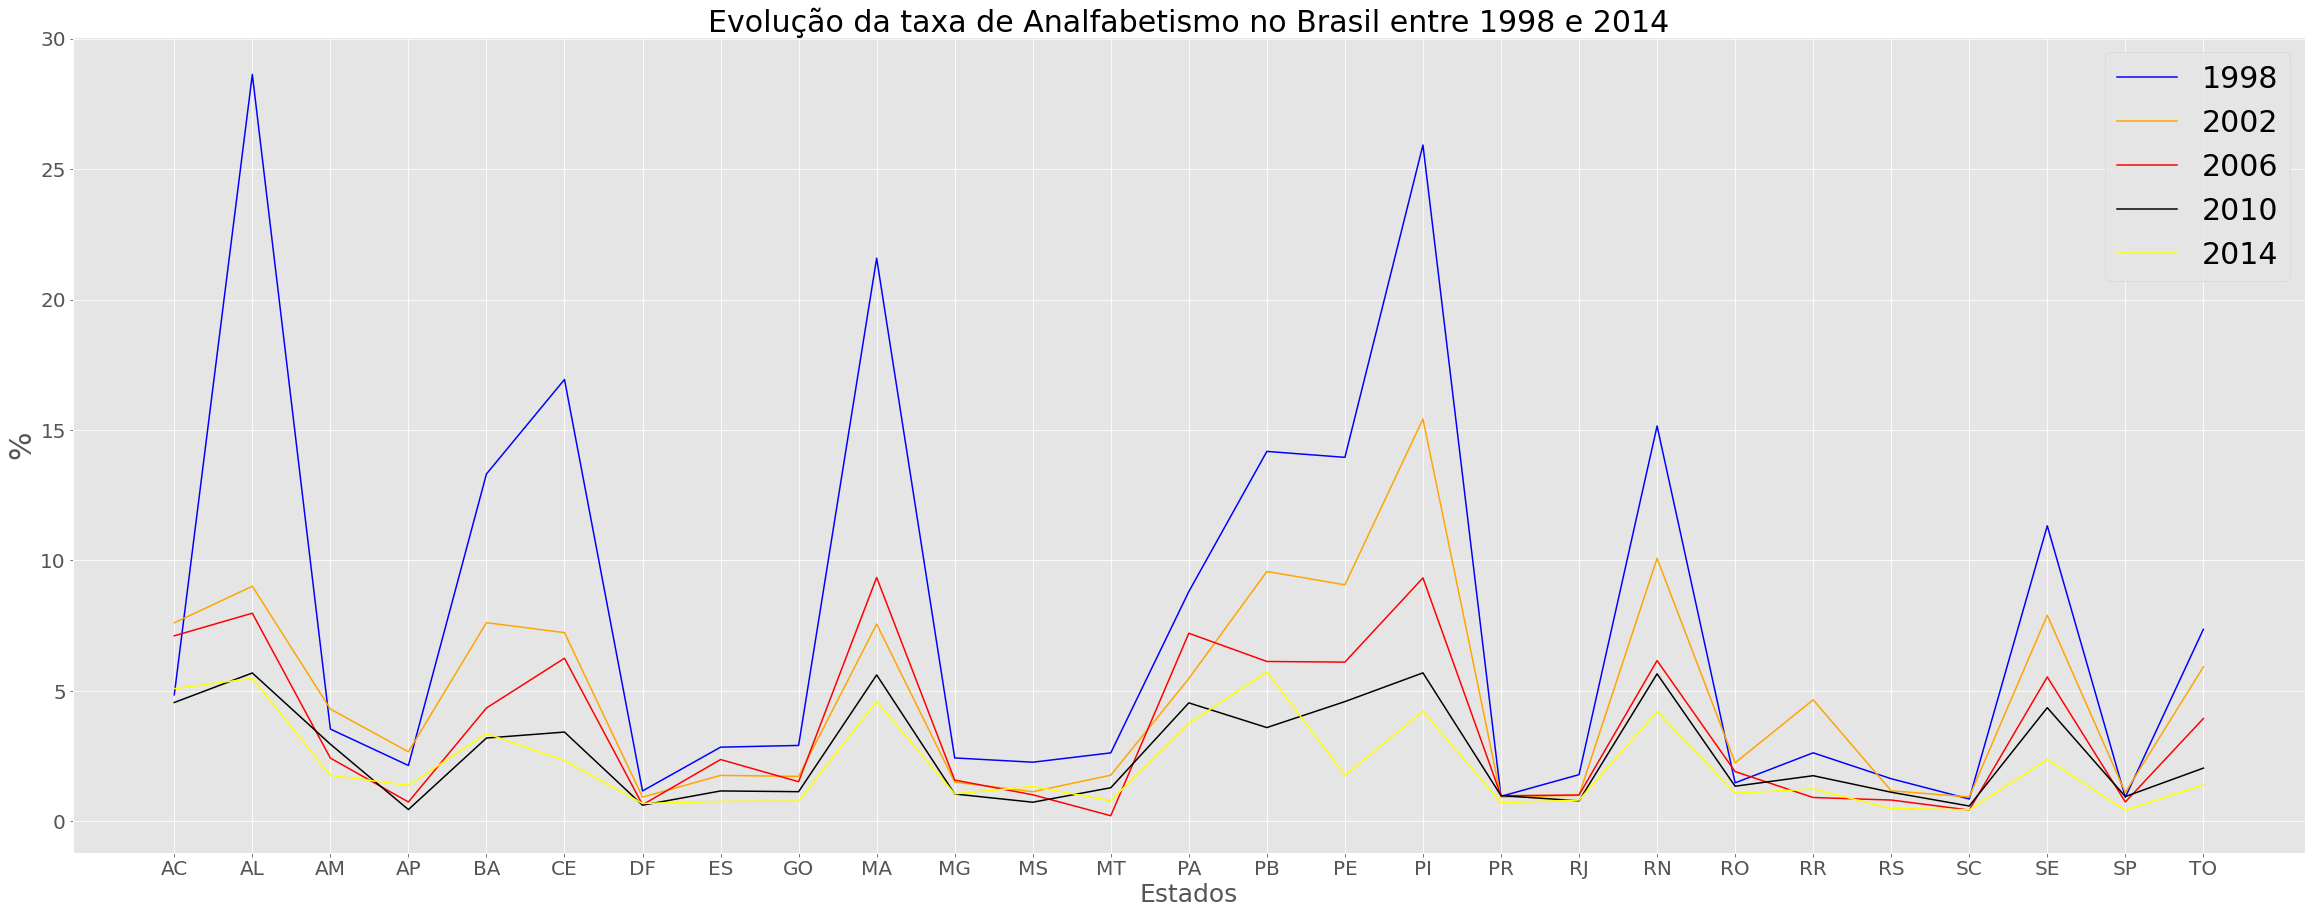

In [17]:
#visualizando através do gráfico de linhas a evolução da taxa de analfabetismo, por estado (utilizaremos nosso df_2)
plt.figure(figsize=(40,15))
plt.title('Evolução da taxa de Analfabetismo no Brasil entre 1998 e 2014', fontsize=30)
plt.xlabel('Estados', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('%', fontsize=30)
plt.yticks(fontsize=20)


sns.lineplot(data=df_2, x='Sigla', y=1998, color="blue", legend='full', label=1998)
sns.lineplot(data=df_2, x='Sigla', y=2002, color="orange", legend='full', label=2002)
sns.lineplot(data=df_2, x='Sigla', y=2006, color="red", legend='full', label=2006)
sns.lineplot(data=df_2, x='Sigla', y=2010, color="black", legend='full', label=2010)
sns.lineplot(data=df_2, x='Sigla', y=2014, color="yellow", legend='full', label=2014)
plt.legend(fontsize=30);

#### Analisando o gráfico acima, podemos notar que alguns estados possuem a taxa de analfabetismo entre a população de 10 a 14 anos, muito acima de outras regiões. Para entender quais estados e o tamanho dessa diferença, iremos utilizar um gráfico em barras, com a média de todos os anos (1998 a 2014) por estado, em ordem decrescente.

In [18]:
#df_media com as médias por estado
df_media_lin = df.mean(axis=1)

In [19]:
#df_media em ordem decrescente
df_media_lin.sort_values(ascending=False, inplace=True)

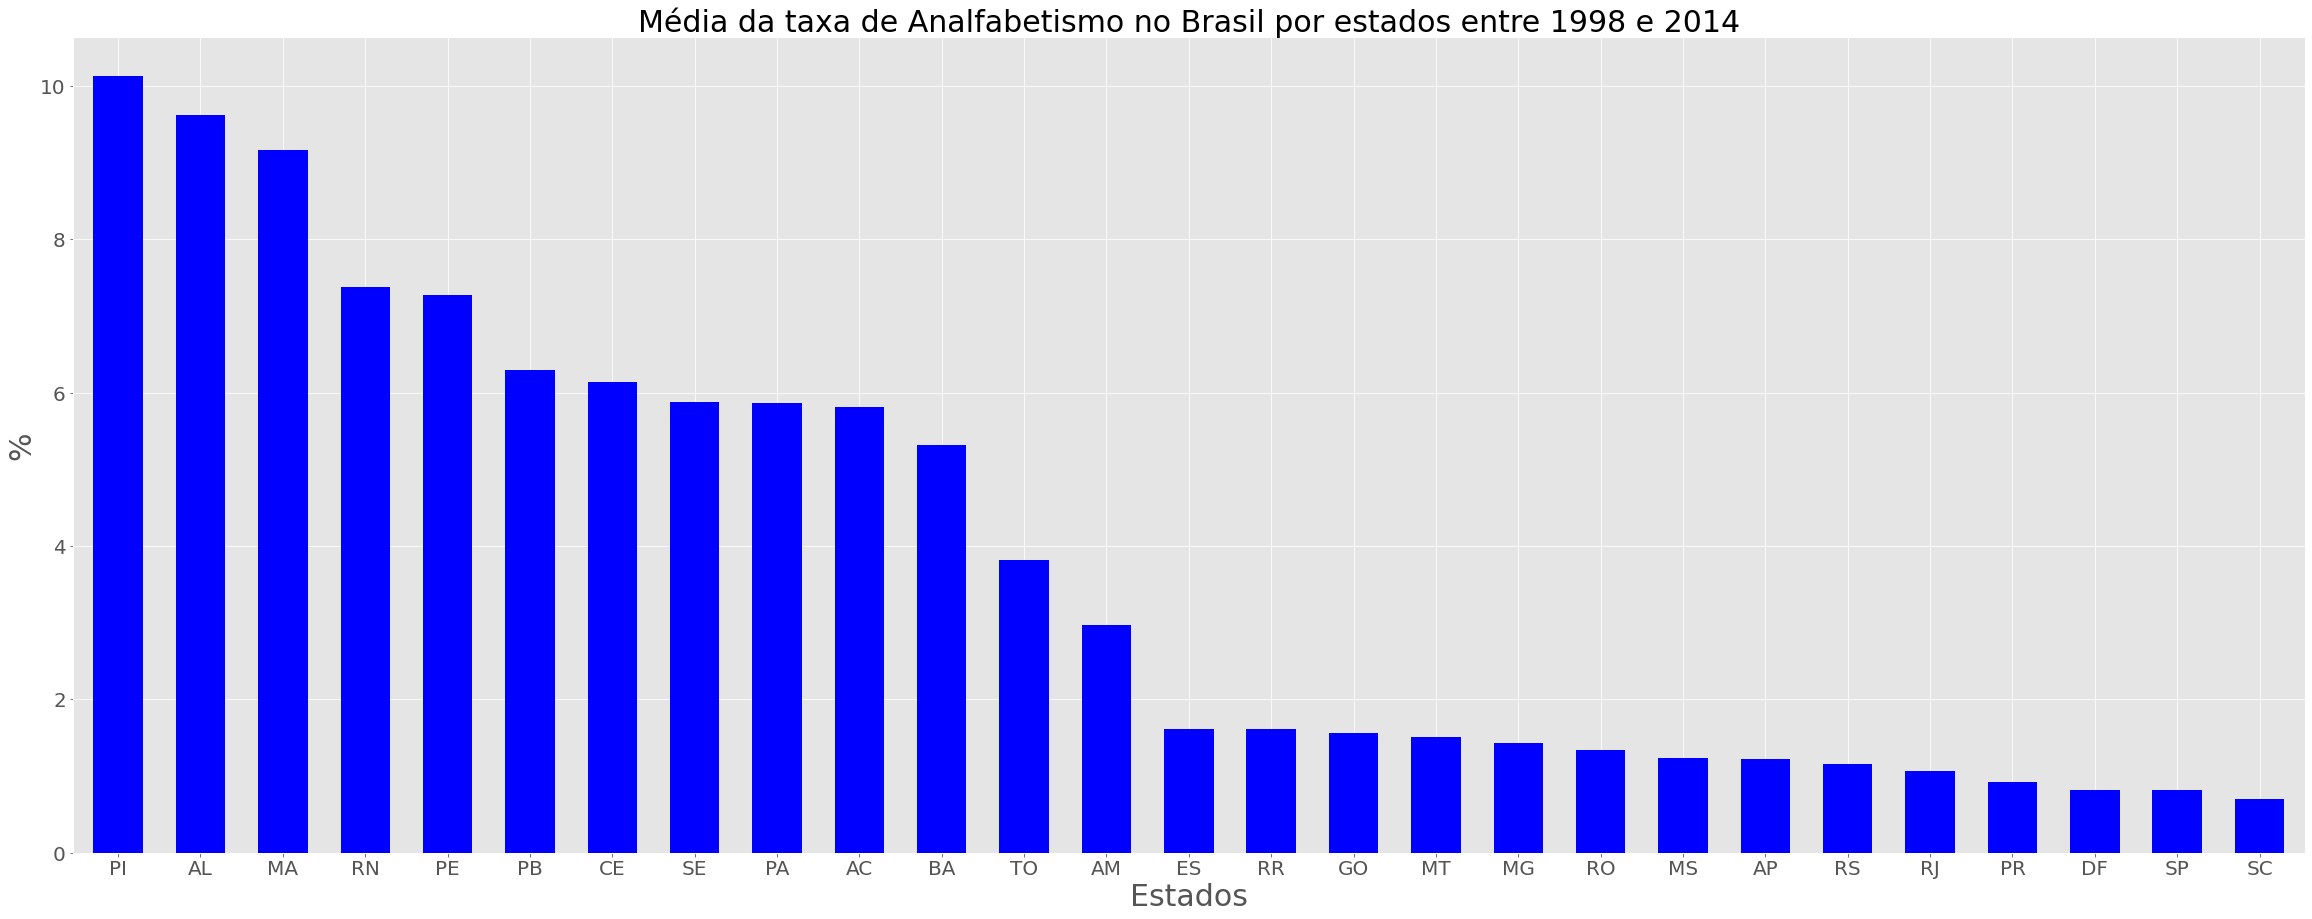

In [20]:
#visualizando df_media através do gráfico de barras a média de analfabetos por estado entre os 1998 e 2014
df_media_lin.plot.bar(width=0.6, linewidth=8, color='blue', figsize=(40,15)) 
plt.xticks(rotation=0, fontsize=20)
plt.xlabel('Estados', fontsize=30)
plt.ylabel('%', fontsize=30)
plt.yticks(rotation=0, fontsize=20)
plt.title('Média da taxa de Analfabetismo no Brasil por estados entre 1998 e 2014', fontsize=30);

#### É possível confirmar que há uma discrepância entre diferentes estados, para visualizarmos essa informação, iremos criar uma novo dataframe, em que agruparemos os estados por região.

In [21]:
#separando os dados por regiões do Brasil
df_nordeste = df.loc[["AL", "BA", "MA", "PI", "RN", "CE", "PB", "PE", "SE"]]
df_norte = df.loc[["AC", "RO", "AM", "RR", "TO", "PA", "AP"]]
df_centro_oeste = df.loc[["DF", "GO", "MT", "MS"]]
df_sudeste = df.loc[["SP", "RJ", "ES", "MG"]]
df_sul = df.loc[["PR", "SC", "RS"]]

In [22]:
#média por região
df_nordeste = df_nordeste.mean()
df_norte = df_norte.mean()
df_centro_oeste = df_centro_oeste.mean()
df_sudeste = df_sudeste.mean()
df_sul = df_sul.mean()

In [23]:
#criando novo dataframe com os dados por região
df_regiao = pd.concat([df_nordeste, df_norte, df_centro_oeste, df_sudeste, df_sul], axis=1)
df_regiao.columns = ["Nordeste", "Norte", "Centro_Oeste", "Sudeste", "Sul"]
df_regiao = df_regiao.T
df_regiao = df_regiao.mean(axis=1)


##### A partir da visualização abaixo podemos confirmar que o nordeste e o norte apresentaram uma taxa muito maior quando comparamos com as demais regiões.

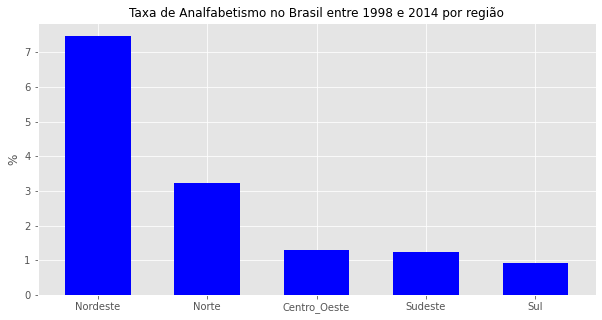

In [24]:
df_regiao.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Taxa de Analfabetismo no Brasil entre 1998 e 2014 por região', fontsize = 12);

#### Também iremos visualizar como ocorreu essa evolução nos anos de 1998, 2002, 2006, 2010 e 2014.  Observação importante para a drástica redução ao longo dos anos, saindo de uma média próxima aos 8% em 1998, para 2% em 2014. Em especial, podemos observar que a queda entre 1998 e 2002 foi a mais acentuada entre os períodos mais próximos.


In [25]:
#média por ano 
df_media_col = df_2.mean()

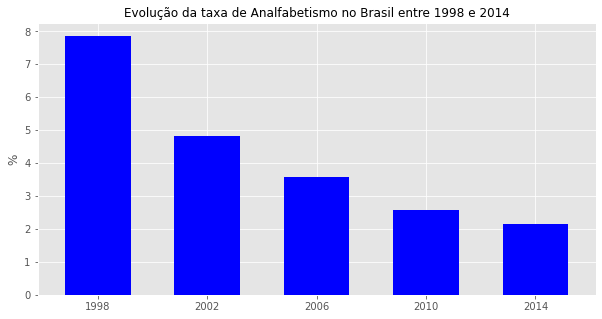

In [26]:
#visualizando através do gráfico de barras o volume total de analfabetos nos anos de 1998, 2002, 2006, 2011 e 2014
df_media_col.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil entre 1998 e 2014', fontsize = 12);


##### Por fim, para colaborar com o trabalho, iremos visualizar a evolução da taxa nos anos destacados acima. Podemos notar que apesar de algumas mudanças sutis, a exemplo de Alagoas que em 1998 encabeçava o ranking com maior taxa de analfabetismo, e cai para segundo lugar em 2004, no geral, estados do nordeste permaneceram com maior índice. Além disto, destaque pra grande redução na taxa em estados do norte como Rondônia e Tocantins, sendo necessário maior investigação das políticas públicas aplicadas nestas regiões que contribuíram com o fato.

In [27]:
#separando os dados por ano
df_1998 = df.pivot_table([1998],['Sigla'])
df_2002 = df.pivot_table([2002],['Sigla']) 
df_2006 = df.pivot_table([2006],['Sigla']) 
df_2010 = df.pivot_table([2010],['Sigla']) 
df_2014 = df.pivot_table([2014],['Sigla']) 

In [28]:
#organizando os dados em ordem decrescente 
df_1998.sort_values(by=1998, ascending=False, inplace=True)
df_2002.sort_values(by=2002, ascending=False, inplace=True)
df_2006.sort_values(by=2006, ascending=False, inplace=True)
df_2010.sort_values(by=2010, ascending=False, inplace=True)
df_2014.sort_values(by=2014, ascending=False, inplace=True)


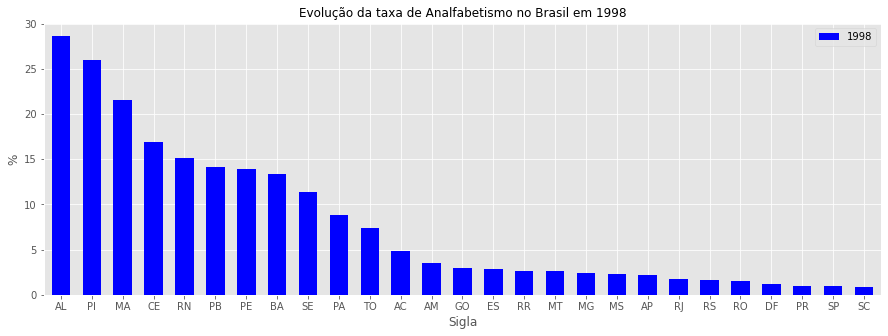

In [29]:
df_1998.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil em 1998', fontsize = 12);


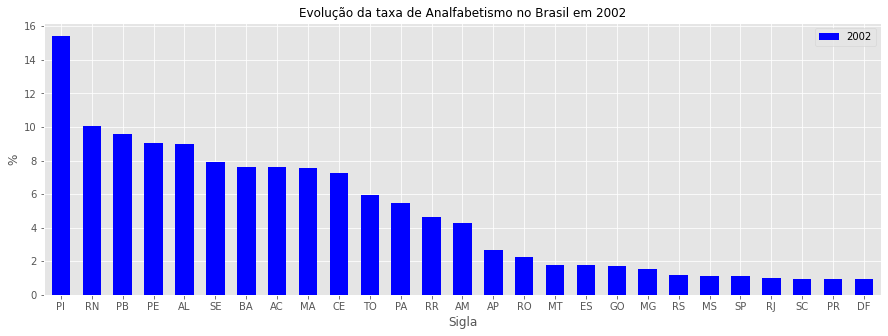

In [30]:
df_2002.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil em 2002', fontsize = 12);


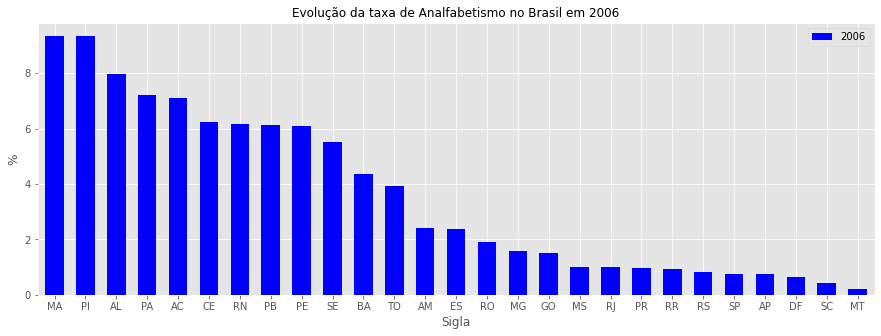

In [31]:
df_2006.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil em 2006', fontsize = 12);


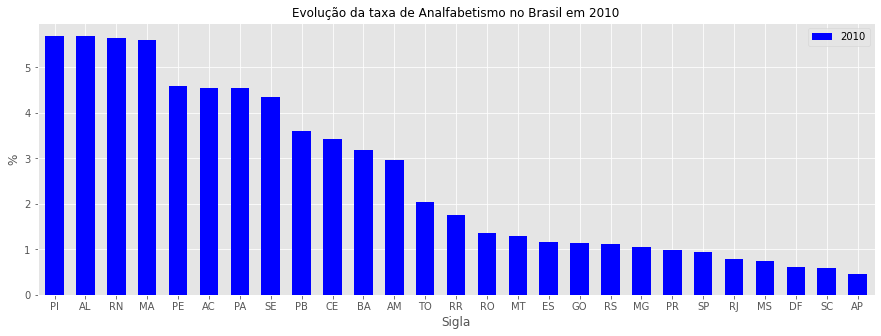

In [32]:
df_2010.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil em 2010', fontsize = 12);


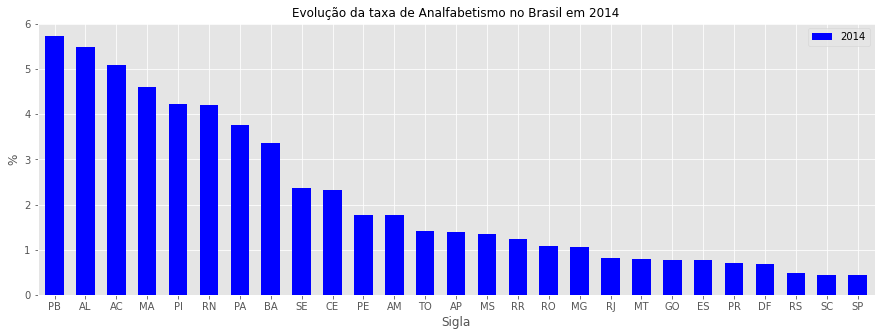

In [33]:
df_2014.plot.bar(width = 0.6, linewidth = 15, color='blue', figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('%', fontsize = 12)
plt.title('Evolução da taxa de Analfabetismo no Brasil em 2014', fontsize = 12);
